In [23]:
import os
import pandas as pd
import numpy as np

from database_processing_functions import *
from a_02_create_data_matrix import *
import matplotlib.pyplot as plt

# Load the surrogate_perfomance data
surrogate_performance = pd.read_csv('surrogate_performance_data_new.csv')
surrogate_performance


,UniqueId,Name,TestOrTrain,Type,RMSECal,RMSESurr,EnergyCal,EnergySurr,StiffCal,StiffSur,a1,a2,a3,a4,a5,a6
0,112,"Galeota et al. 1996, AA4",Train,Flexure,0.000794,0.000962,0.001511,0.004346,0.961578,1.044139,4.560000,0.081053,0.028819,0.200000,3.125000,0.478548
1,60,"Muguruma et al. 1989, BL-1",Train,Flexure,0.000981,0.001160,0.005189,0.014401,0.914078,1.031358,2.500000,0.131140,0.045819,0.253886,0.972222,0.736114
2,216,"Paultre and Legeron, 2000, No. 1006025",Train,Flexure,0.000847,0.001332,0.019765,0.011450,0.947581,0.918685,6.557377,0.118369,0.078085,0.276522,0.884956,0.229786
3,299,"Petrovski and Ristic 1984, M1E1",Train,Flexure,0.001857,0.001756,0.023836,0.022301,0.710297,1.064267,2.000000,0.410811,0.053067,0.389930,1.000000,0.928720
4,156,"Nosho et al. 1996, No. 1",Train,Flexure,0.001284,0.001298,0.002626,0.003151,1.121052,0.892726,7.637795,0.101990,0.008439,0.339495,6.047619,0.451830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,283,"Ang et al. 1985, No. 17",Test,Flexure-Shear,0.001515,0.001308,0.084482,0.016750,1.014900,0.896846,2.000000,0.417725,0.022998,0.100067,1.666667,1.336156
287,80,"Wight and Sozen 1973, No. 25.033(East)",Test,Shear,0.000976,0.001121,0.009035,0.008407,0.988759,1.143760,2.872131,0.361124,0.033161,0.071259,3.359788,1.093090
288,282,"Ang et al. 1985, No. 16",Test,Shear,0.001101,0.001980,0.016937,0.038231,0.940156,1.034520,2.000000,0.240552,0.022072,0.000000,1.666667,0.848960
289,281,"Ang et al. 1985, No. 15",Test,Flexure-Shear,0.001130,0.001713,0.017495,0.028776,1.025680,0.723038,2.000000,0.407644,0.022793,0.000000,1.666667,1.406019


Text(0.5, 0.5, '$V_f/V_s$')

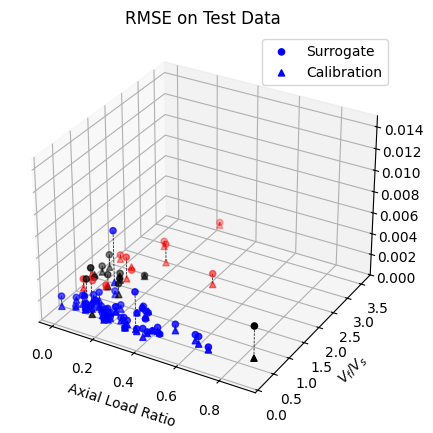

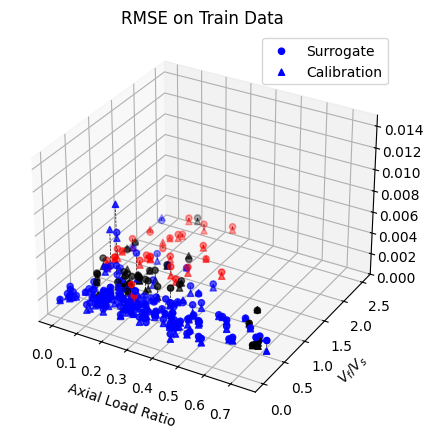

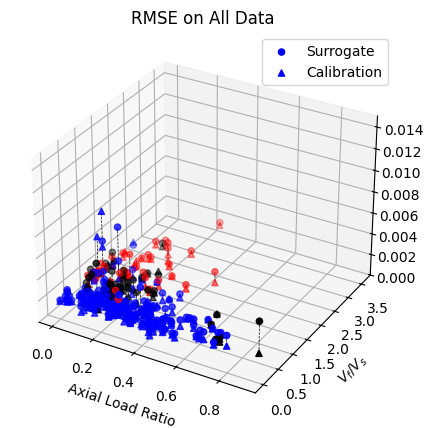

In [24]:
# Generate 3D scatter plot
pars = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6']

# Parameter labels [ar, lrr, srr, alr, sdr, smr]
par_labels = ['Aspect Ratio $D/L$', 'Long. Reinf. Ratio', 'Trans. Reinf. Ratio', 'Axial Load Ratio', 'Spacing', '$V_f/V_s$']

xpar_index, ypar_index = 3, 5

xpar = pars[xpar_index]
ypar = pars[ypar_index]

# Labels for the plots
xpar_label = par_labels[xpar_index]
ypar_label = par_labels[ypar_index]

# Filter only test data
test_data = surrogate_performance[surrogate_performance['TestOrTrain'] == 'Test']
# Plot properties
dpi_plots = 100
figuresize = (5, 5)
colors = {'Flexure': 'b', 'Flexure-Shear': 'k', 'Shear': 'r'}

# Create a 3D scatter plot of rmse_sur 
fig = plt.figure(dpi=dpi_plots, figsize=figuresize)
ax = fig.add_subplot(111, projection='3d')

# Create a color map based on FailureType
color_values = test_data['Type'].map(colors)
ax.scatter(test_data[xpar], test_data[ypar], test_data['RMSESurr'], c=color_values, marker='o', label='Surrogate')
# Add rmse_cal
ax.scatter(test_data[xpar], test_data[ypar], test_data['RMSECal'], c=color_values, marker='^', label='Calibration')  
# Join both with vertical lines

for i in range(len(test_data)):
    ax.plot([test_data[xpar].iloc[i], test_data[xpar].iloc[i]], 
            [test_data[ypar].iloc[i], test_data[ypar].iloc[i]], 
            [test_data['RMSESurr'].iloc[i], test_data['RMSECal'].iloc[i]], c='k', linestyle='--', linewidth=0.5)
    
ax.legend()
plt.title('RMSE on Test Data')
ax.set_zlim(0, 0.015)
#ax.set_ylim(0, 2)
# Add labels for x and y axes
ax.set_xlabel(xpar_label)
ax.set_ylabel(ypar_label)


# Same as above for train data

# Filter only train data
train_data = surrogate_performance[surrogate_performance['TestOrTrain'] == 'Train']

fig = plt.figure(dpi=dpi_plots, figsize=figuresize)
ax = fig.add_subplot(111, projection='3d')

# Create a color map based on FailureType
color_values = train_data['Type'].map(colors)

# Create a 3D scatter plot of rmse_sur
ax.scatter(train_data[xpar], train_data[ypar], train_data['RMSESurr'], c=color_values, marker='o', label='Surrogate')
# Add rmse_cal
ax.scatter(train_data[xpar], train_data[ypar], train_data['RMSECal'], c=color_values, marker='^', label='Calibration')
# Join both with vertical lines
for i in range(len(train_data)):
    ax.plot([train_data[xpar].iloc[i], train_data[xpar].iloc[i]], 
            [train_data[ypar].iloc[i], train_data[ypar].iloc[i]], 
            [train_data['RMSESurr'].iloc[i], train_data['RMSECal'].iloc[i]], c='k', linestyle='--', linewidth=0.5)
    
ax.legend()
plt.title('RMSE on Train Data')
ax.set_zlim(0, 0.015)
ax.set_xlabel(xpar_label)
ax.set_ylabel(ypar_label)
# ax.set_ylim(0, 2)

# Do same with all data
all_data = surrogate_performance
fig = plt.figure(dpi=dpi_plots, figsize=figuresize)
ax = fig.add_subplot(111, projection='3d')
# Create a 3D scatter plot of rmse_sur

# Create a color map based on FailureType

color_values = all_data['Type'].map(colors)

# Create a 3D scatter plot of rmse_sur with color based on FailureType
ax.scatter(all_data[xpar], all_data[ypar], all_data['RMSESurr'], c=color_values, marker='o', label='Surrogate')
ax.scatter(all_data[xpar], all_data[ypar], all_data['RMSECal'], c=color_values, marker='^', label='Calibration')

# Join both with vertical lines
for i in range(len(all_data)):
    ax.plot([all_data[xpar].iloc[i], all_data[xpar].iloc[i]], 
            [all_data[ypar].iloc[i], all_data[ypar].iloc[i]], 
            [all_data['RMSESurr'].iloc[i], all_data['RMSECal'].iloc[i]], c='k', linestyle='--', linewidth=0.5)

ax.legend()
plt.title('RMSE on All Data')
ax.set_zlim(0, 0.015)
ax.set_xlabel(xpar_label)
ax.set_ylabel(ypar_label)
#ax.set_ylim(0, 2)
    

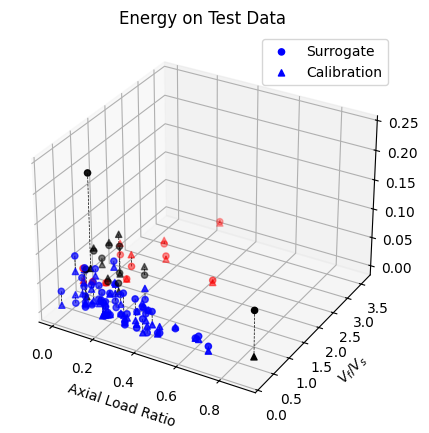

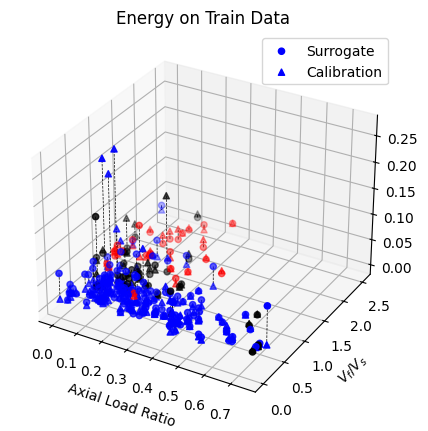

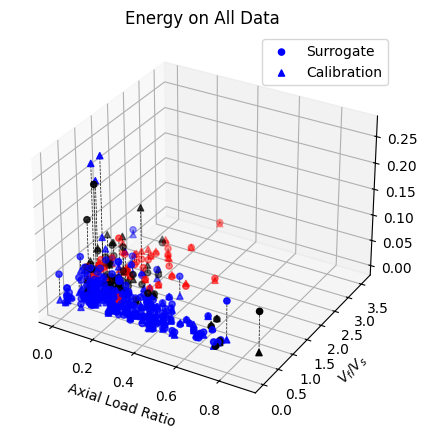

In [25]:
# Now, do same as above for energy_cal and energy_sur

# Generate 3D scatter plot

# Filter only test data
test_data = surrogate_performance[surrogate_performance['TestOrTrain'] == 'Test']
# Create a 3D scatter plot of energy_sur
fig = plt.figure(dpi=dpi_plots, figsize=figuresize)
ax = fig.add_subplot(111, projection='3d')

# Create a color map based on FailureType
color_values = test_data['Type'].map(colors)

ax.scatter(test_data[xpar], test_data[ypar], test_data['EnergySurr'], c=color_values, marker='o', label='Surrogate')
# Add energy_cal
ax.scatter(test_data[xpar], test_data[ypar], test_data['EnergyCal'], c=color_values, marker='^', label='Calibration')
# Join both with vertical lines
for i in range(len(test_data)):
    ax.plot([test_data[xpar].iloc[i], test_data[xpar].iloc[i]], 
            [test_data[ypar].iloc[i], test_data[ypar].iloc[i]], 
            [test_data['EnergySurr'].iloc[i], test_data['EnergyCal'].iloc[i]], c='k', linestyle='--', linewidth=0.5)

ax.legend()
plt.title('Energy on Test Data')
ax.set_xlabel(xpar_label)
ax.set_ylabel(ypar_label)
# ax.set_ylim(0, 2)

# Do same for train data
train_data = surrogate_performance[surrogate_performance['TestOrTrain'] == 'Train']
fig = plt.figure(dpi=dpi_plots, figsize=figuresize)
ax = fig.add_subplot(111, projection='3d')

# Create a color map based on FailureType
color_values = train_data['Type'].map(colors)

# Create a 3D scatter plot of energy_sur
ax.scatter(train_data[xpar], train_data[ypar], train_data['EnergySurr'], c=color_values, marker='o', label='Surrogate')
# Add energy_cal
ax.scatter(train_data[xpar], train_data[ypar], train_data['EnergyCal'], c=color_values, marker='^', label='Calibration')
# Join both with vertical lines
for i in range(len(train_data)):
    ax.plot([train_data[xpar].iloc[i], train_data[xpar].iloc[i]], 
            [train_data[ypar].iloc[i], train_data[ypar].iloc[i]], 
            [train_data['EnergySurr'].iloc[i], train_data['EnergyCal'].iloc[i]], c='k', linestyle='--', linewidth=0.5)

ax.legend()
plt.title('Energy on Train Data')
ax.set_xlabel(xpar_label)
ax.set_ylabel(ypar_label)
# ax.set_ylim(0, 2)

# Do same for all data
all_data = surrogate_performance
fig = plt.figure(dpi=dpi_plots, figsize=figuresize)
ax = fig.add_subplot(111, projection='3d')

# Create a color map based on FailureType
color_values = all_data['Type'].map(colors)

# Create a 3D scatter plot of energy_sur
ax.scatter(all_data[xpar], all_data[ypar], all_data['EnergySurr'], c=color_values, marker='o', label='Surrogate')
# Add energy_cal
ax.scatter(all_data[xpar], all_data[ypar], all_data['EnergyCal'], c=color_values, marker='^', label='Calibration')
# Join both with vertical lines
for i in range(len(all_data)):
    ax.plot([all_data[xpar].iloc[i], all_data[xpar].iloc[i]], 
            [all_data[ypar].iloc[i], all_data[ypar].iloc[i]], 
            [all_data['EnergySurr'].iloc[i], all_data['EnergyCal'].iloc[i]], c='k', linestyle='--', linewidth=0.5)

ax.legend()
plt.title('Energy on All Data')
ax.set_xlabel(xpar_label)
ax.set_ylabel(ypar_label)
#ax.set_ylim(0, 2)

plt.show()  # Show all plots

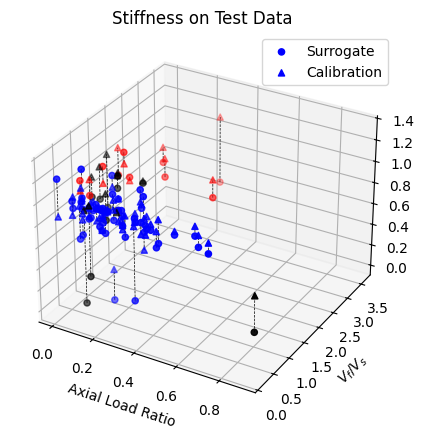

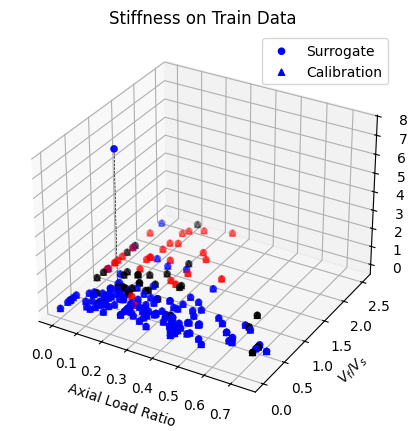

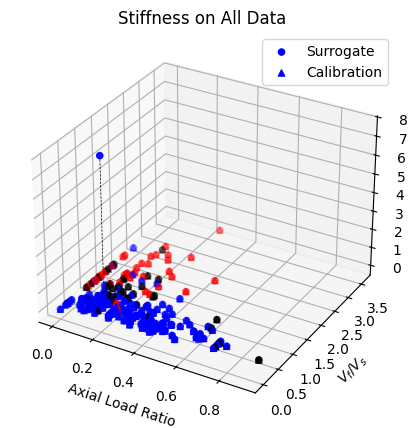

In [26]:
# Do same as above but for stiff_cal and stiff_sur
# Generate 3D scatter plot
# Filter only test data
test_data = surrogate_performance[surrogate_performance['TestOrTrain'] == 'Test']
# Create a 3D scatter plot of stiff_sur
fig = plt.figure(dpi=dpi_plots, figsize=figuresize)
ax = fig.add_subplot(111, projection='3d')
# Create a color map based on FailureType
color_values = test_data['Type'].map(colors)
ax.scatter(test_data[xpar], test_data[ypar], test_data['StiffSur'], c=color_values, marker='o', label='Surrogate')
# Add stiff_cal
ax.scatter(test_data[xpar], test_data[ypar], test_data['StiffCal'], c=color_values, marker='^', label='Calibration')
# Join both with vertical lines
for i in range(len(test_data)):
    ax.plot([test_data[xpar].iloc[i], test_data[xpar].iloc[i]], 
            [test_data[ypar].iloc[i], test_data[ypar].iloc[i]], 
            [test_data['StiffSur'].iloc[i], test_data['StiffCal'].iloc[i]], c='k', linestyle='--', linewidth=0.5)
ax.legend()
plt.title('Stiffness on Test Data')
ax.set_xlabel(xpar_label)
ax.set_ylabel(ypar_label)
# ax.set_ylim(0, 2)
# Do same for train data
train_data = surrogate_performance[surrogate_performance['TestOrTrain'] == 'Train']
fig = plt.figure(dpi=dpi_plots, figsize=figuresize)
ax = fig.add_subplot(111, projection='3d')
# Create a color map based on FailureType
color_values = train_data['Type'].map(colors)
# Create a 3D scatter plot of stiff_sur
ax.scatter(train_data[xpar], train_data[ypar], train_data['StiffSur'], c=color_values, marker='o', label='Surrogate')
# Add stiff_cal
ax.scatter(train_data[xpar], train_data[ypar], train_data['StiffCal'], c=color_values, marker='^', label='Calibration')
# Join both with vertical lines

for i in range(len(train_data)):
    ax.plot([train_data[xpar].iloc[i], train_data[xpar].iloc[i]], 
            [train_data[ypar].iloc[i], train_data[ypar].iloc[i]], 
            [train_data['StiffSur'].iloc[i], train_data['StiffCal'].iloc[i]], c='k', linestyle='--', linewidth=0.5)
ax.legend()
plt.title('Stiffness on Train Data')
ax.set_xlabel(xpar_label)
ax.set_ylabel(ypar_label)
# ax.set_ylim(0, 2)
# Do same for all data
all_data = surrogate_performance
fig = plt.figure(dpi=dpi_plots, figsize=figuresize)
ax = fig.add_subplot(111, projection='3d')

# Create a color map based on FailureType
color_values = all_data['Type'].map(colors)
# Create a 3D scatter plot of stiff_sur
ax.scatter(all_data[xpar], all_data[ypar], all_data['StiffSur'], c=color_values, marker='o', label='Surrogate')
# Add stiff_cal
ax.scatter(all_data[xpar], all_data[ypar], all_data['StiffCal'], c=color_values, marker='^', label='Calibration')
# Join both with vertical lines
for i in range(len(all_data)):
    ax.plot([all_data[xpar].iloc[i], all_data[xpar].iloc[i]], 
            [all_data[ypar].iloc[i], all_data[ypar].iloc[i]], 
            [all_data['StiffSur'].iloc[i], all_data['StiffCal'].iloc[i]], c='k', linestyle='--', linewidth=0.5)
    
ax.legend()
plt.title('Stiffness on All Data')
ax.set_xlabel(xpar_label)
ax.set_ylabel(ypar_label)
#ax.set_ylim(0, 2)
plt.show()  # Show all plots